 Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the 
classification algorithms discussed in the session)

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
# Load the iris dataset from a CSV file
iris_data = pd.read_excel(r"C:\Users\ACER\Downloads\iris (4).xls")

In [133]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
# Access the features (inputs) and target (outputs) of the dataset
X = iris_data.iloc[:, :-1]  # Features
y = iris_data.iloc[:, -1]  # Target

# Print the shape of the features and target dataframes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (150, 4)
Target shape: (150,)


In [135]:
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [136]:
iris_data.isnull().sum()  #for finding null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [137]:
iris_data=iris_data.dropna()
iris_data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [138]:
num_col = ['SL','SW','PL','PW']  #for finding outliers

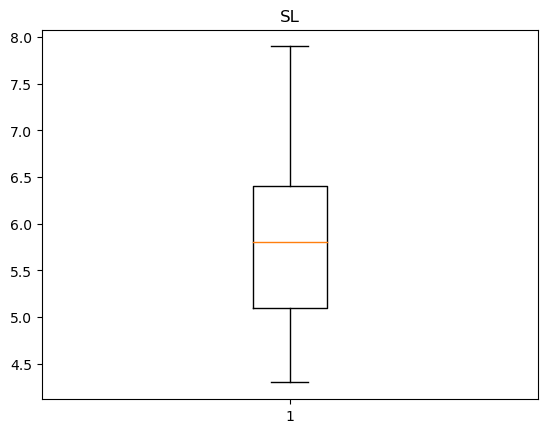

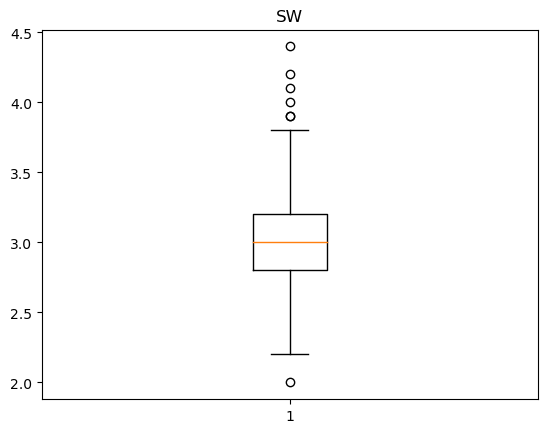

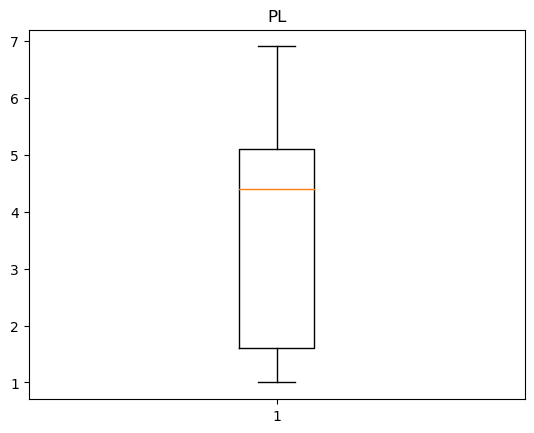

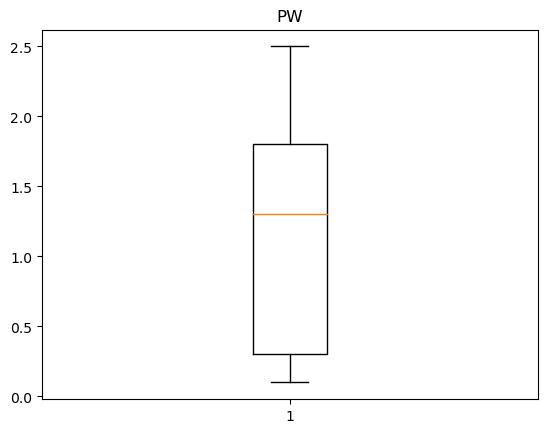

In [139]:
for i in num_col:
    plt.boxplot(iris_data[i])
    plt.title(i)
    plt.show()

In [140]:
# Select the "sepal width (SW)" column
sepal_width = iris_data['SW']

# Calculate the IQR (Interquartile Range)
Q1 = sepal_width.quantile(0.25)
Q3 = sepal_width.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
iris_data_no_outliers = iris_data[(sepal_width >= lower_bound) & (sepal_width <= upper_bound)]

# Print the shape of the dataset before and after removing outliers
print("Original dataset shape:", iris_data.shape)
print("Dataset shape after removing outliers:", iris_data_no_outliers.shape)

Original dataset shape: (131, 5)
Dataset shape after removing outliers: (124, 5)


Encoding 

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_data['Classification'] = le.fit_transform(iris_data['Classification'])

In [142]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [143]:
iris_data['Classification'].unique()

array([0, 1, 2])

In [144]:
iris_data['Classification'].value_counts()

2    45
1    44
0    42
Name: Classification, dtype: int64

In [145]:
iris_data['Classification'].value_counts(normalize=True)

2    0.343511
1    0.335878
0    0.320611
Name: Classification, dtype: float64

In [146]:
iris_data = pd.get_dummies(iris_data)

In [147]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [148]:
#splitting data to feature and target
X = iris_data.drop('Classification',axis=1)
y = iris_data['Classification']

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

Logistic Regression

In [150]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr = logit_model.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy =',accuracy_score(y_test,y_pred_lr))
print('precision =',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall =',recall_score(y_test,y_pred_lr,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr,average='macro'))

Accuracy = 1.0
precision = 1.0
Recall = 1.0
f1 score = 1.0


In [152]:
confusion_matrix(y_test,y_pred_lr)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

In [153]:
y_pred_lr

array([1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1])

In [154]:
y_test

65     1
48     0
22     0
36     0
132    2
66     1
80     1
121    2
93     1
31     0
111    2
32     0
75     1
5      0
113    2
116    2
44     0
92     1
108    2
97     1
20     0
12     0
139    2
13     0
145    2
54     1
81     1
90     1
57     1
0      0
14     0
50     1
61     1
Name: Classification, dtype: int32

Scaling

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
minmax = MinMaxScaler()

In [157]:
type(X)

pandas.core.frame.DataFrame

In [158]:
x = pd.DataFrame(X)

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [160]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr = logit_model.predict(X_test)

In [161]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy =',accuracy_score(y_test,y_pred_lr))
print('precision =',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall =',recall_score(y_test,y_pred_lr,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr,average='macro'))

Accuracy = 1.0
precision = 1.0
Recall = 1.0
f1 score = 1.0


 k-Nearest Neighbor

In [162]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)
    

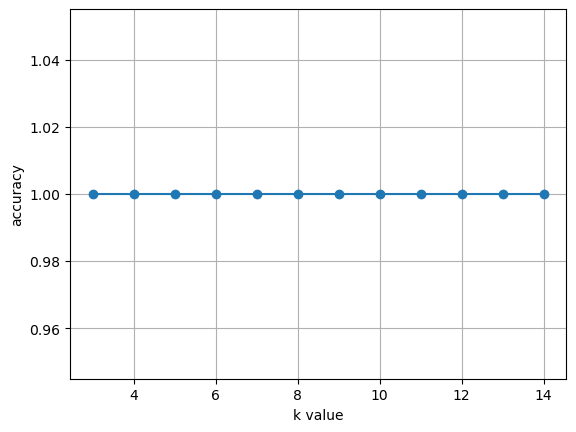

In [163]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [164]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [165]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy =',accuracy_score(y_test,y_pred_knn))
print('precision =',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall =',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))

Accuracy = 1.0
precision = 1.0
Recall = 1.0
f1 score = 1.0


In [166]:
confusion_matrix(y_test,y_pred_knn)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

Scaling

In [167]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
minmax = MinMaxScaler()

In [169]:
type(X)

pandas.core.frame.DataFrame

In [170]:
x = pd.DataFrame(X)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)
    

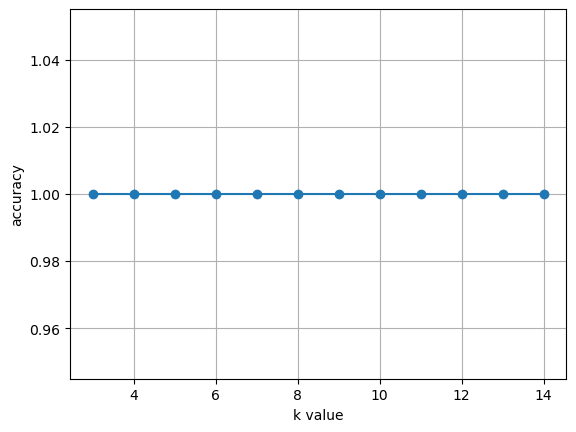

In [172]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [173]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [174]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy =',accuracy_score(y_test,y_pred_knn))
print('precision =',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall =',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))

Accuracy = 1.0
precision = 1.0
Recall = 1.0
f1 score = 1.0


In [175]:
confusion_matrix(y_test,y_pred_knn)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

HERE BOTH MODEL IS BETTER FOR ME 